In [10]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [11]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-10-25-17-11_Power_/"

In [12]:
masterdata = pd.read_csv(path_to_results + "Power.csv")

In [13]:
masterdata.head()

,refId,testId,ncols,avgprecpu,stdpre,avgruncpu,stdrun,avgcon,stdcon,power
0,linear-l-2-0.0-gaussian-0,MWP,2,4.017613,8.121871,0.464042,0.716847,0.999675,0.004662,0.997
1,linear-l-2-0.0-gaussian-0,MWPn,2,6.738709,8.155324,0.567494,0.788626,0.968766,0.139549,0.934
2,linear-l-2-0.0-gaussian-0,MWPu,2,4.678515,7.747117,1.392377,1.942684,0.959116,0.152486,0.898
3,linear-l-2-0.0-gaussian-0,KSP,2,2.395368,0.802204,0.473184,0.210619,0.999980,0.000282,1.000
4,linear-l-2-0.0-gaussian-0,KSPn,2,3.394858,6.253369,2.028113,2.048603,1.000000,0.000000,1.000


In [14]:
# simplify the refIds
extract = [x.split("-")[1:4] + [x.split("-")[5]] for x in masterdata["refId"]]
extract = [["ic"]+x[1::] if(x[0]=="independentcat") else x for x in extract]
extract = [["lc"]+x[1::] if(x[0]=="linearcat") else x for x in extract]
masterdata["noise"] = [x[2] for x in extract]
masterdata["noise"] = masterdata["noise"].astype(float)
masterdata["refId"] = ["-".join(x) for x in extract]

In [15]:
masterdata.head()

,refId,testId,ncols,avgprecpu,stdpre,avgruncpu,stdrun,avgcon,stdcon,power,noise
0,l-2-0.0-0,MWP,2,4.017613,8.121871,0.464042,0.716847,0.999675,0.004662,0.997,0.0
1,l-2-0.0-0,MWPn,2,6.738709,8.155324,0.567494,0.788626,0.968766,0.139549,0.934,0.0
2,l-2-0.0-0,MWPu,2,4.678515,7.747117,1.392377,1.942684,0.959116,0.152486,0.898,0.0
3,l-2-0.0-0,KSP,2,2.395368,0.802204,0.473184,0.210619,0.999980,0.000282,1.000,0.0
4,l-2-0.0-0,KSPn,2,3.394858,6.253369,2.028113,2.048603,1.000000,0.000000,1.000,0.0


In [16]:
masterdata["deptype"] = [x[0] for x in extract]

In [17]:
masterdata["deptype"].unique()

array(['l', 'si_5.0', 'si_1.0', 'st', 'cr', 'zi', 'i', 'hs', 'dl_0.25',
       'p_1.0', 'hc', 'P2_1.0', 'ho', 'hcg'], dtype=object)

In [18]:
prettynames = {
    'si_5.0': "S5", 
    'si_1.0': "S1", 
    'hs': "Hs", 
    'st': "St", 
    'dl_0.25': "Dl", 
    'p_1.0': "P", 
    'P2_1.0': "P2", 
    'zi': "Zi", 
    'i': "I", 
    'l': "L",
    'hcg': "HcG", 
    'hc': "Hc", 
    'ho': "H", 
    'cr': "C",
    "MWP" : "MWP",
    "MWPn": "MWP$^n$",
    "KSP" : "KSP",
    "KSPn": "KSP$^n$",
    "CSP" : "CSP",
    "CSPn": "CSP$^n$",
    "l" : "L",
    "lc" : "L$^*$"
}

<IPython.core.display.Javascript object>


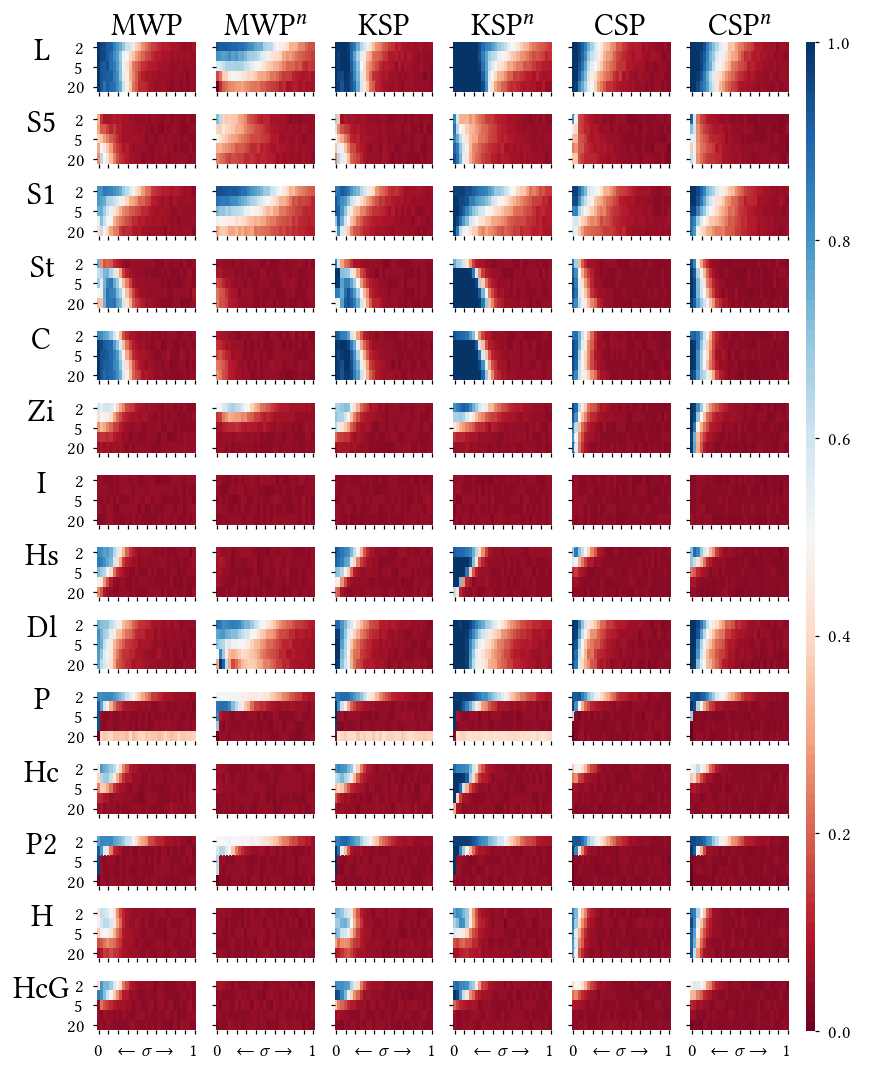

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [20]:
%matplotlib notebook

tests = ['MWP', 'MWPn', 'KSP', 'KSPn', 'CSP', 'CSPn']

fig, axes = plt.subplots(nrows=len(masterdata["deptype"].unique()), ncols=len(tests), figsize=(10,12), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for deptype in masterdata["deptype"].unique():
    cbar_ax1 = fig.add_axes([.90, 0.04, .01, 0.92])
    measure = "power"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])

#plt.savefig("power_all.pdf")

In [21]:
prettynames = {
    'si_5.0': "S5", 
    'si_1.0': "S1", 
    'hs': "Hs", 
    'st': "St", 
    'dl_0.25': "Dl", 
    'p_1.0': "P", 
    'P2_1.0': "P", 
    'zi': "Zi", 
    'i': "I", 
    'l': "L",
    'hcg': "HcG", 
    'hc': "Hc", 
    'ho': "H", 
    'cr': "C",
    "MWP" : "MWP",
    "MWPn": "MWP",
    "KSP" : "KSP",
    "KSPn": "KSP",
    "CSP" : "CSP",
    "CSPn": "CSP",
    "l" : "L",
    "lc" : "L$^*$"
}

<IPython.core.display.Javascript object>


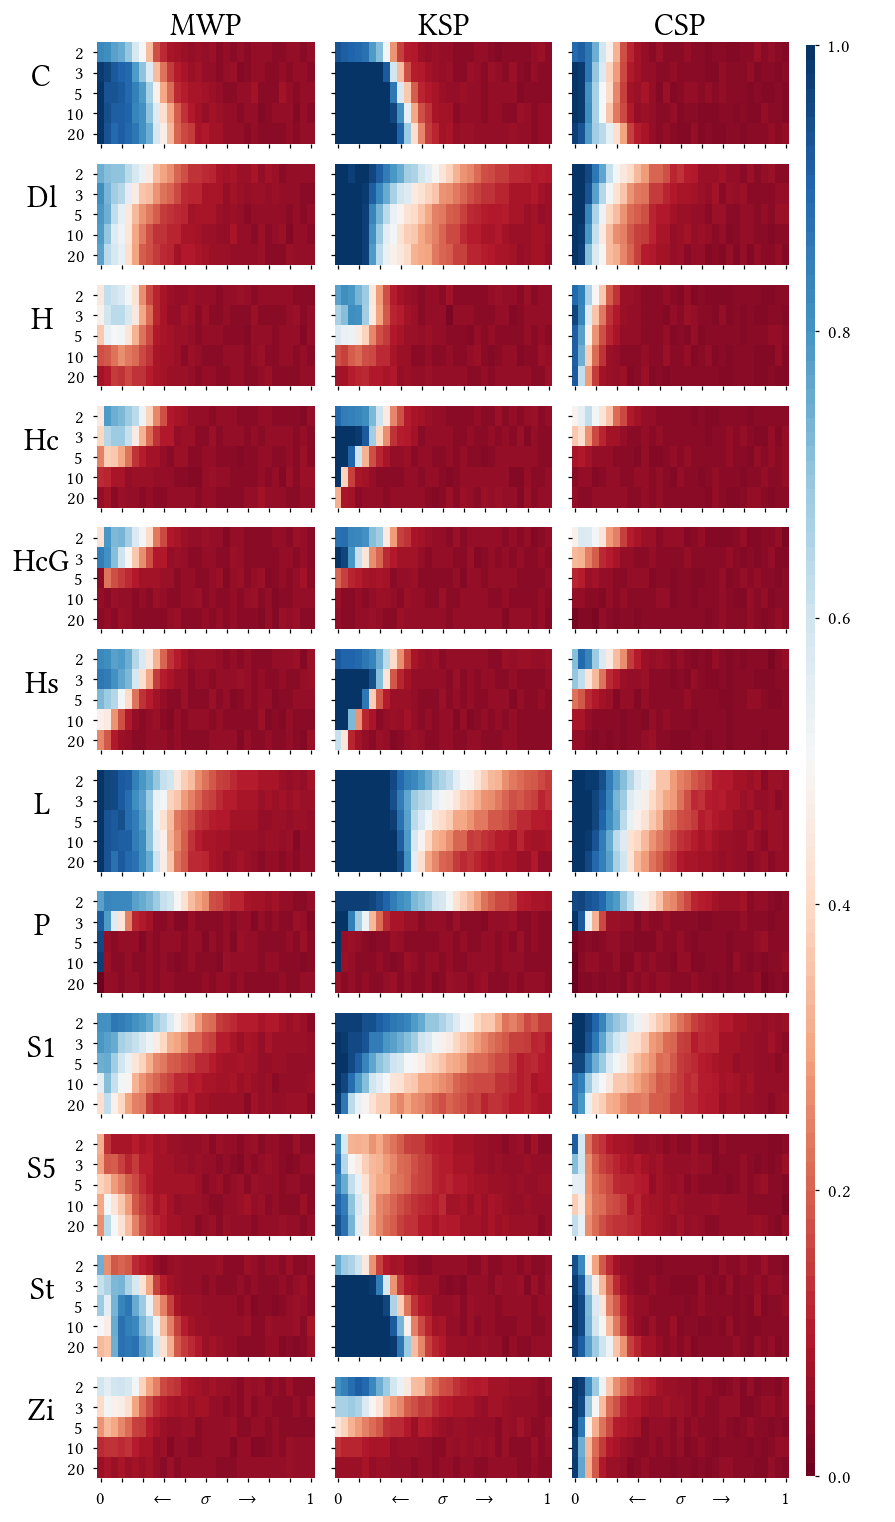

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [22]:
%matplotlib notebook

tests = ['MWP', 'KSPn', 'CSPn']
deptypes = ["cr", "dl_0.25", "ho", "hc", "hcg", "hs", "l", "P2_1.0", "si_1.0", "si_5.0", "st", "zi"]#, "i"]

fig, axes = plt.subplots(nrows=len(deptypes), ncols=len(tests), figsize=(10,17), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for deptype in deptypes:
    cbar_ax1 = fig.add_axes([.90, 0.03, .01, 0.94])
    measure = "power"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
        ax.set_yticklabels(["2", "3", "5", "10", "20"])
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])

#plt.savefig("power.pdf")

# Figure 6: Power of MWP/KSP/CSP

<IPython.core.display.Javascript object>


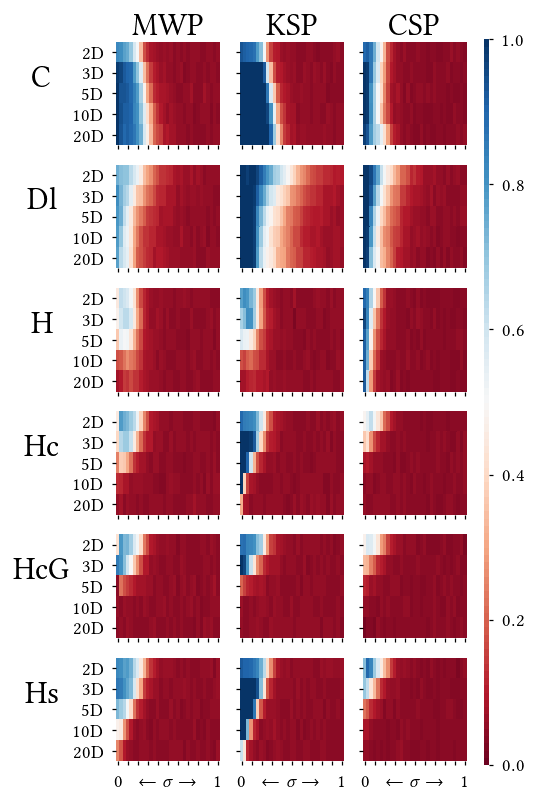

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [23]:
%matplotlib notebook

tests = ['MWP', 'KSPn', 'CSPn']
deptypes = ["cr", "dl_0.25", "ho", "hc", "hcg", "hs"]#, "i"]

fig, axes = plt.subplots(nrows=len(deptypes), ncols=len(tests), figsize=(6,9), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for deptype in deptypes:
    cbar_ax1 = fig.add_axes([.90, 0.05, .01, 0.90])
    measure = "power"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=25)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
        ax.set_yticklabels([r"$2$D", r"$3$D", r"$5$D", r"$10$D", r"$20$D"], ha='right')
        yax = ax.get_yaxis()
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])
    
plt.savefig("plots/Fig6_left.pdf")

<IPython.core.display.Javascript object>


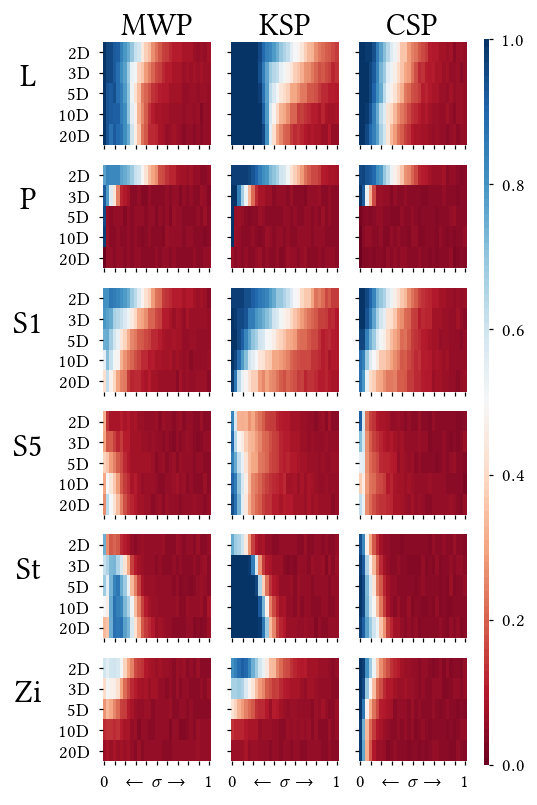

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [24]:
%matplotlib notebook

tests = ['MWP', 'KSPn', 'CSPn']
deptypes = ["l", "P2_1.0", "si_1.0", "si_5.0", "st", "zi"]#, "i"]

fig, axes = plt.subplots(nrows=len(deptypes), ncols=len(tests), figsize=(6,9), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for deptype in deptypes:
    cbar_ax1 = fig.add_axes([.90, 0.05, .01, 0.90])
    measure = "power"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=25)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
        ax.set_yticklabels([r"$2$D", r"$3$D", r"$5$D", r"$10$D", r"$20$D"], ha='right')
        yax = ax.get_yaxis()
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])
    
plt.savefig("plots/Fig6_right.pdf")